In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
super_data = pd.read_csv('super_covid_data.csv')

In [3]:
super_data.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [4]:
wyoming_data = super_data[super_data['State_x'] == 'WY']


columns_cases = [col for col in wyoming_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in wyoming_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']


def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))
    

    weekly_stats = weekly_data['count'].agg(['mean', 'median'])
    

    mode_df = weekly_data['count'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.NaN)
    weekly_stats['mode'] = mode_df
    
    return weekly_stats


weekly_cases_stats = calculate_weekly_stats(wyoming_data, columns_cases)

weekly_deaths_stats = calculate_weekly_stats(wyoming_data, columns_deaths)

print("Weekly Cases Stats:")
print(weekly_cases_stats.head())  
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())  


Weekly Cases Stats:
                  mean  median  mode
date                                
2020-07-05   68.600000    27.0     2
2020-07-12   76.900621    29.0    27
2020-07-19   87.993789    38.0     4
2020-07-26  101.745342    44.0     4
2020-08-02  116.291925    56.0     5

Weekly Deaths Stats:
                mean  median  mode
date                              
2020-07-05  0.869565     0.0     0
2020-07-12  0.900621     0.0     0
2020-07-19  1.000000     0.0     0
2020-07-26  1.080745     0.0     0
2020-08-02  1.086957     0.0     0


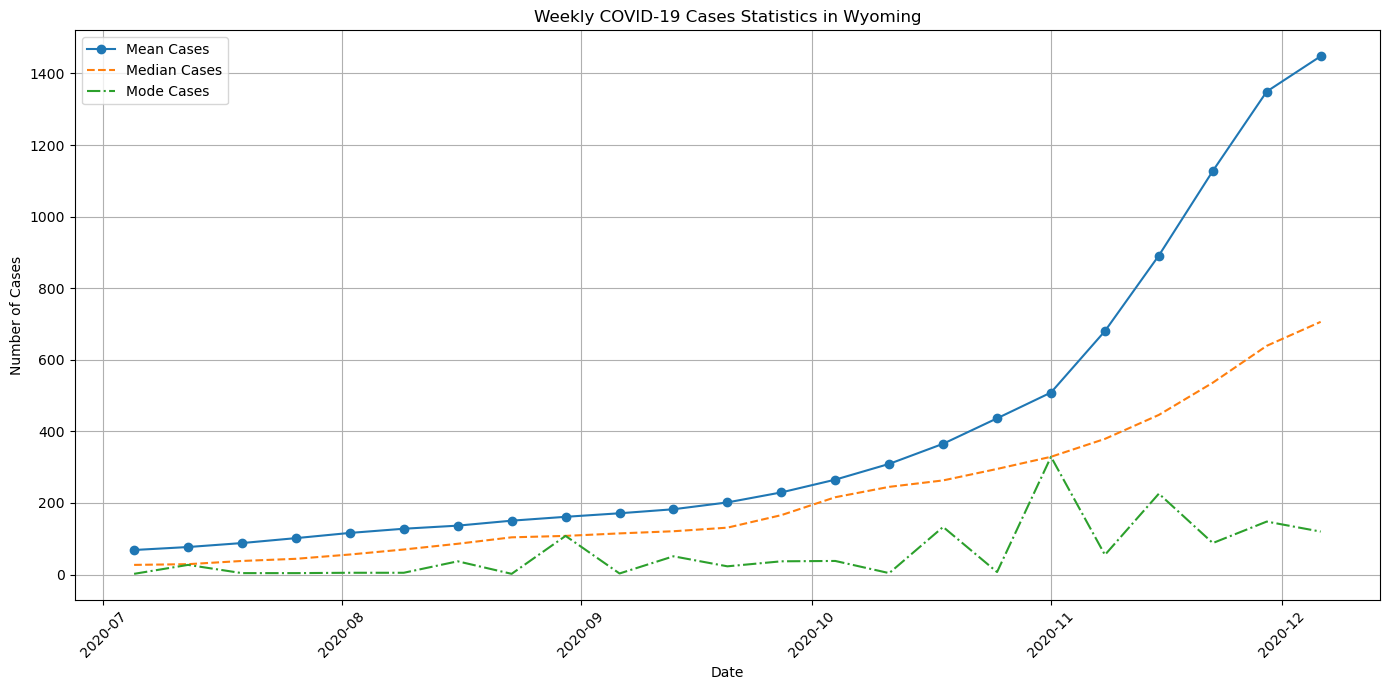

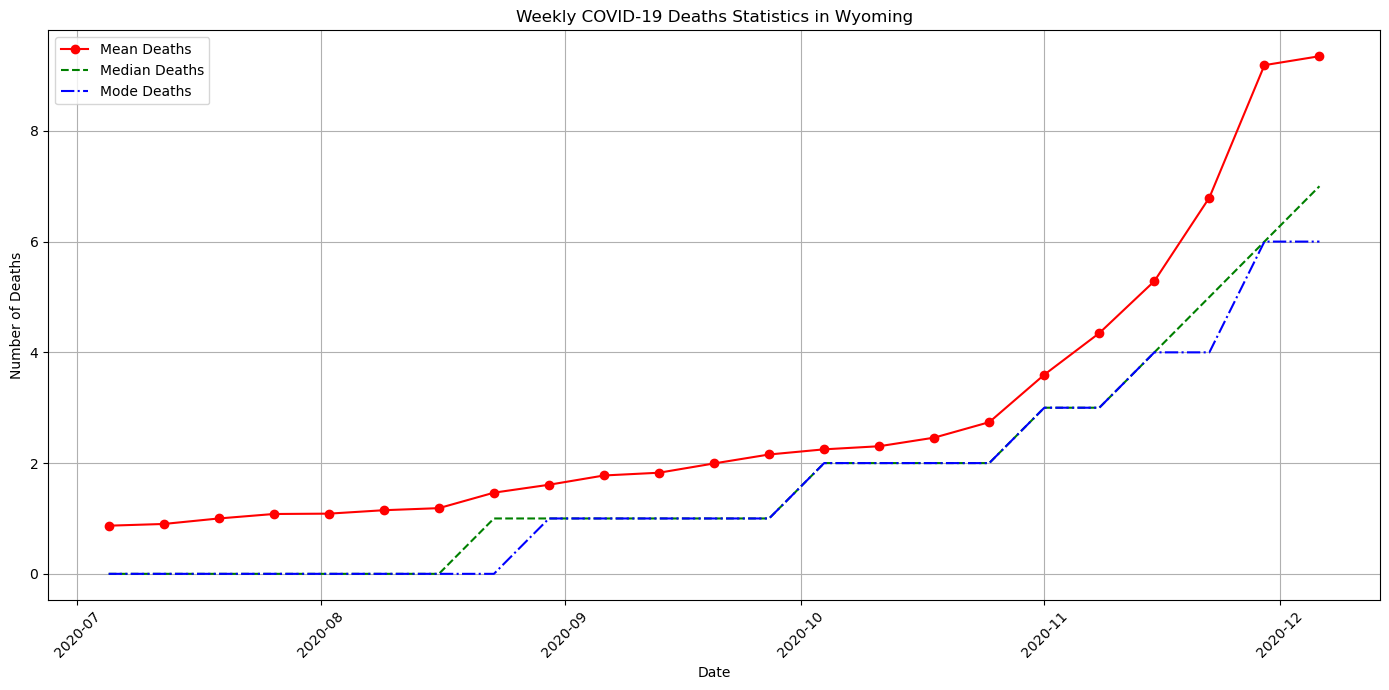

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mean'], label='Mean Cases', marker='o')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['median'], label='Median Cases', linestyle='--')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mode'], label='Mode Cases', linestyle='-.')
plt.title('Weekly COVID-19 Cases Statistics in Wyoming')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mean'], label='Mean Deaths', marker='o', color='red')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['median'], label='Median Deaths', linestyle='--', color='green')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mode'], label='Mode Deaths', linestyle='-.', color='blue')
plt.title('Weekly COVID-19 Deaths Statistics in Wyoming')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [9]:

population = {
    'WY': 578759,  
    'NC': 10488084,  
    'SC': 5148714,  
    'CO': 5758736,  
    'AZ': 7278717, 
    'TX': 28995881,
}


def prepare_state_data(state_code):
    state_data = super_data[super_data['State_x'] == state_code]
    columns_cases = [col for col in state_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
    columns_deaths = [col for col in state_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']
    weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)

    weekly_cases_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population[state_code]) * 100000
    weekly_deaths_stats[['mean', 'median']] = (weekly_deaths_stats[['mean', 'median']] / population[state_code]) * 100000
    return weekly_cases_stats['mean'], weekly_deaths_stats['mean'] 


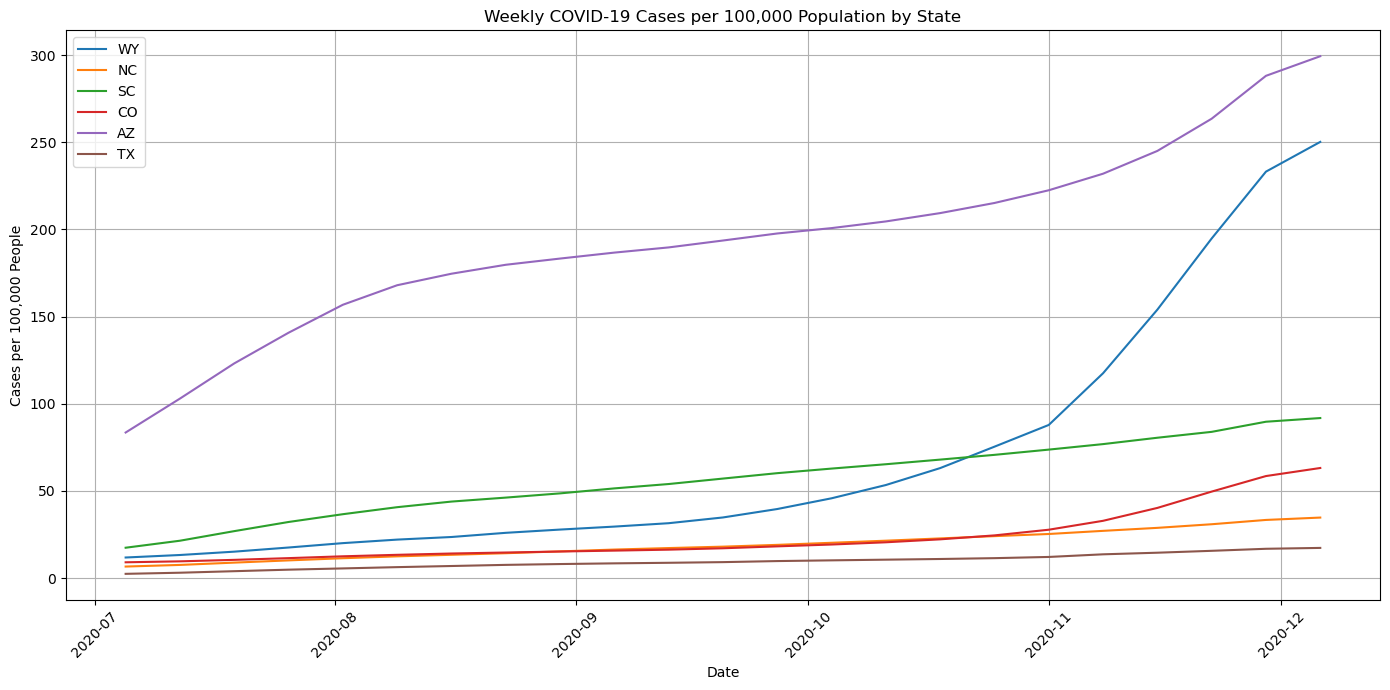

In [10]:
plt.figure(figsize=(14, 7))

for state_code in ['WY', 'NC', 'SC', 'CO', 'AZ', 'TX']:
    weekly_cases_mean, _ = prepare_state_data(state_code)
    plt.plot(weekly_cases_mean.index, weekly_cases_mean, label=state_code)

plt.title('Weekly COVID-19 Cases per 100,000 Population by State')
plt.xlabel('Date')
plt.ylabel('Cases per 100,000 People')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()